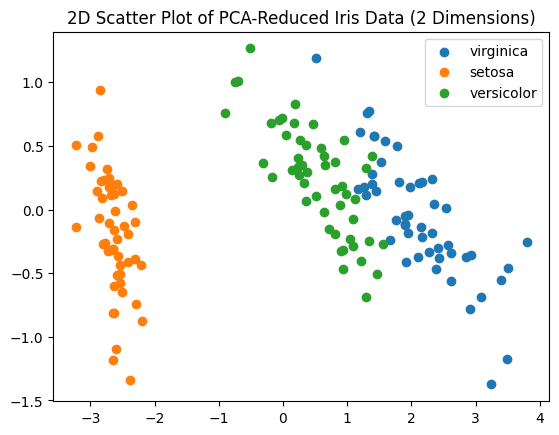

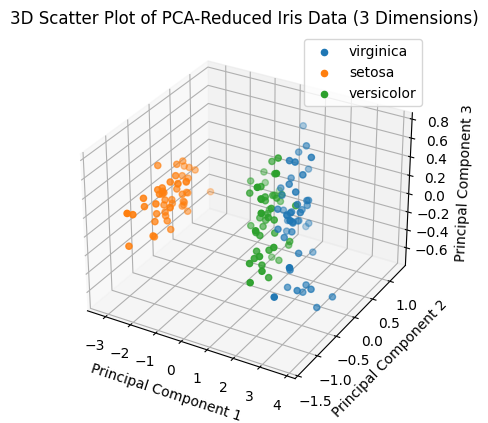

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
class PCA:
  def __init__(self, n_dimention: int):
    self.n_dimention = n_dimention

  def fit_transform(self, X):
    mean = np.mean(X, axis=0)
    X = X - mean

    cov = X.T.dot(X) / X.shape[0]
    eigen_values, eigen_vectors, = np.linalg.eig(cov)

    select_index = np.argsort(eigen_values)[::-1][:self.n_dimention]
    U = eigen_vectors[:, select_index]
    X_new = X.dot(U)
    return X_new


df = pd.read_csv(r"iris.csv")
X = df[["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]].to_numpy()
Y = df["species"].to_numpy()

pca2 = PCA(n_dimention=2)
new_X2 = pca2.fit_transform(X)


for label in set(Y):
  X_class = new_X2[Y == label]
  plt.scatter(X_class[:, 0], X_class[:, 1], label=label)
plt.legend()
plt.title("2D Scatter Plot of PCA-Reduced Iris Data (2 Dimensions)")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pca3 = PCA(n_dimention=3)
new_X3 = pca3.fit_transform(X)
for label in set(Y):
    X_class = new_X3[Y == label]
    ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label=label)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.legend()
plt.title("3D Scatter Plot of PCA-Reduced Iris Data (3 Dimensions)")
plt.show()

<ipython-input-20-aa3e6b219720>:44: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  W = np.hstack((eigen_pairs[i][1].reshape(-1, 1) for i in range(num_components)))
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


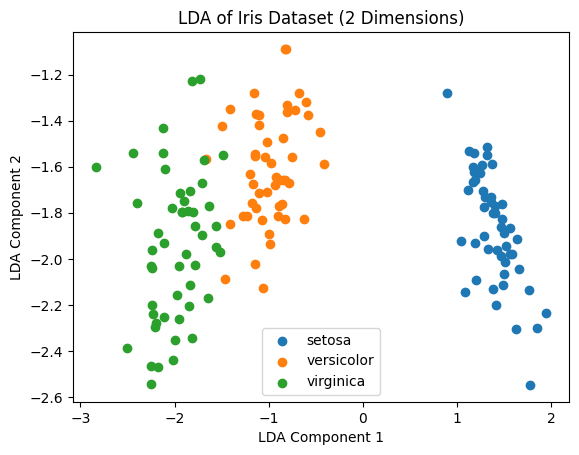

TypeError: ignored

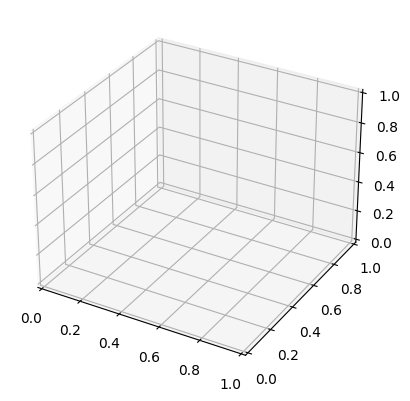

In [20]:
# Extract features and labels
X = df[["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]].to_numpy()
Y = df["species"].to_numpy()

# Get unique class labels
unique_labels = np.unique(Y)

# Calculate the overall mean
overall_mean = np.mean(X, axis=0)

# Initialize within-class and between-class scatter matrices
within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
between_class_scatter = np.zeros((X.shape[1], X.shape[1]))

# Loop through each class
for label in unique_labels:
    # Select data points for the current class
    X_class = X[Y == label]

    # Calculate the class mean
    class_mean = np.mean(X_class, axis=0)

    # Calculate the centered data points
    centered_samples = X_class - class_mean

    # Update the within-class scatter matrix
    within_class_scatter += centered_samples.T.dot(centered_samples)

    # Calculate the mean difference
    mean_diff = class_mean - overall_mean

    # Update the between-class scatter matrix
    between_class_scatter += len(X_class) * mean_diff.reshape(-1, 1).dot(mean_diff.reshape(1, -1))

# Calculate eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

# Sort eigenvalues and corresponding eigenvectors in descending order
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Create the transformation matrix W
num_components = 2  # Number of dimensions to reduce to
W = np.hstack((eigen_pairs[i][1].reshape(-1, 1) for i in range(num_components)))

# Project the data onto the new subspace
X_lda = X.dot(W)

# Visualize the reduced data
for label in unique_labels:
    X_class = X_lda[Y == label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=label)

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.title("LDA of Iris Dataset (2 Dimensions)")
plt.show()




<ipython-input-30-bc53e71e9c5f>:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  self.W = np.hstack((eigen_pairs[i][1].reshape(-1, 1) for i in range(self.n_dimension)))
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


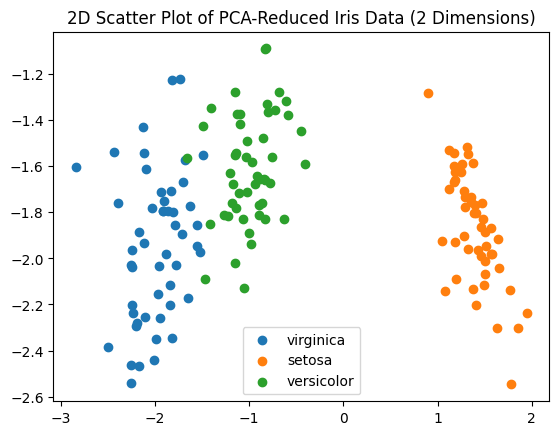

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


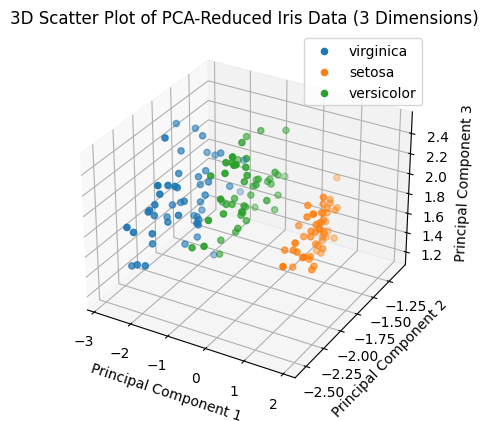

In [30]:
import numpy as np

class LDA:
    def __init__(self, n_dimension):
        self.n_dimension = n_dimension
        self.W = None  # Transformation matrix

    def fit_lda(self, X, y):
        # Get unique class labels
        unique_labels = np.unique(y)

        # Calculate the overall mean
        overall_mean = np.mean(X, axis=0)

        # Initialize within-class and between-class scatter matrices
        within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
        between_class_scatter = np.zeros((X.shape[1], X.shape[1]))

        # Loop through each class
        for label in unique_labels:
            # Select data points for the current class
            X_class = X[y == label]

            # Calculate the class mean
            class_mean = np.mean(X_class, axis=0)

            # Calculate the centered data points
            centered_samples = X_class - class_mean

            # Update the within-class scatter matrix
            within_class_scatter += centered_samples.T.dot(centered_samples)

            # Calculate the mean difference
            mean_diff = class_mean - overall_mean

            # Update the between-class scatter matrix
            between_class_scatter += len(X_class) * mean_diff.reshape(-1, 1).dot(mean_diff.reshape(1, -1))

        # Calculate eigenvalues and eigenvectors
        eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

        # Sort eigenvalues and corresponding eigenvectors in descending order
        eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
        eigen_pairs.sort(key=lambda x: x[0], reverse=True)

        # Create the transformation matrix W
        self.W = np.hstack((eigen_pairs[i][1].reshape(-1, 1) for i in range(self.n_dimension)))

    def transform(self, X):
        if self.W is None:
            raise ValueError("LDA has not been fitted yet. Please use fit_lda method first.")
        return X.dot(self.W)


X = df[["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]].to_numpy()
Y = df["species"].to_numpy()
lda = LDA(n_dimension=2)
lda.fit_lda(X, Y)
X_lda = lda.transform(X)

#print(X_lda)

for label in set(Y):
  X_class = X_lda[Y == label]
  plt.scatter(X_class[:, 0], X_class[:, 1], label=label)
plt.legend()
plt.title("2D Scatter Plot of PCA-Reduced Iris Data (2 Dimensions)")
plt.show()

lda3 = LDA(n_dimension=3)
lda3.fit_lda(X, Y)
X_lda3 = lda3.transform(X)

# Visualize the reduced data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Y = df["species"].to_numpy()

for label in set(Y):
    X_class = X_lda3[Y == label]
    ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label=label)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.legend()
plt.title("3D Scatter Plot of PCA-Reduced Iris Data (3 Dimensions)")
plt.show()